In [1]:
#Import all necessary modules
import pandas as pd  ###Software library written for the Python programming language for data manipulation and analysis.
import numpy as np ### fundamental package for scientific computing with Python
import os ### using operating system dependent functionality
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('cubic_zirconia.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [5]:
df.shape

(26967, 11)

In [6]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [8]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [9]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [10]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [12]:
# Getting the summary statistics of the  object variable.
df.describe(include=['object'])

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [13]:
print('Number of rows having 0 values in x: ',df[df.x==0].value_counts().sum())
print('Number of rows having 0 values in y: ',df[df.y==0].value_counts().sum())
print('Number of rows having 0 values in z: ',df[df.z==0].value_counts().sum())
df.shape

Number of rows having 0 values in x:  3
Number of rows having 0 values in y:  3
Number of rows having 0 values in z:  9


(26967, 10)

In [14]:
#Dropping dimentionless diamonds
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(26958, 10)

In [15]:
print('Number of duplicate rows = %d' % (df.duplicated().sum()))
print(df.shape)

Number of duplicate rows = 33
(26958, 10)


In [16]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26958, 10)
After (26925, 10)


In [17]:
df.duplicated().sum()

0

In [18]:
def univariateanalysis(column):
    print('Description of '+column)
    print('.................................................................')
    print(df[column].describe())
    
    plt.figure()
    print('.................................................................')
    print('Plot for '+column)
    print('.................................................................')
    
    print(sns.distplot(df[column],kde=True,color='g'))
    plt.show()
   
    
    plt.figure()
    print('.................................................................')
    print('Plot for '+column)
    print('.................................................................')
    print(sns.boxplot(df[column]))
    plt.show()
    

In [19]:
j=df.loc[:,df.dtypes!=object].columns.to_list()
j

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

Description of carat
.................................................................
count    26925.000000
mean         0.797821
std          0.477085
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64
.................................................................
Plot for carat
.................................................................


C:\diksha\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


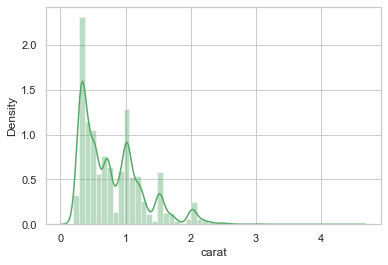

.................................................................
Plot for carat
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


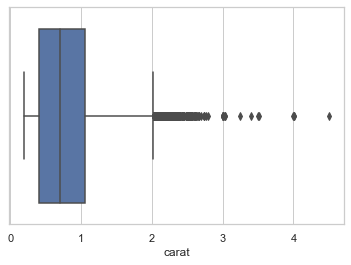

Description of depth
.................................................................
count    26228.000000
mean        61.745573
std          1.411824
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64
.................................................................
Plot for depth
.................................................................


C:\diksha\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


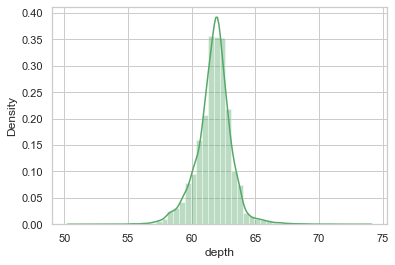

.................................................................
Plot for depth
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


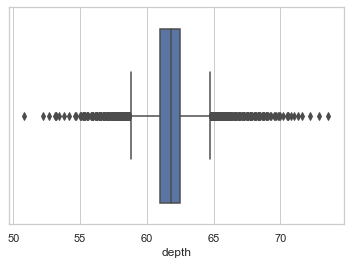

Description of table
.................................................................
count    26925.000000
mean        57.455305
std          2.231327
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64
.................................................................
Plot for table
.................................................................


C:\diksha\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


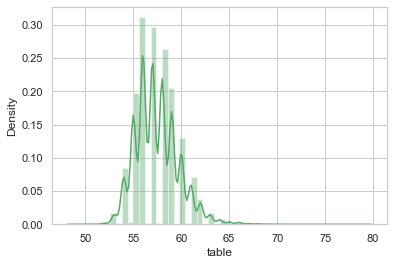

.................................................................
Plot for table
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


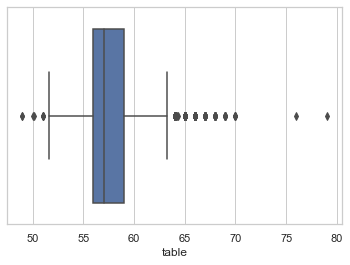

Description of x
.................................................................
count    26925.000000
mean         5.729385
std          1.126081
min          3.730000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: x, dtype: float64
.................................................................
Plot for x
.................................................................


C:\diksha\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


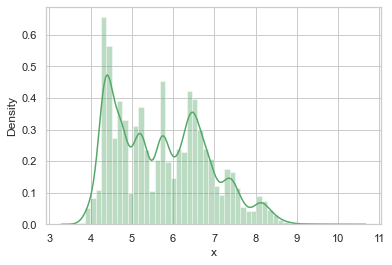

.................................................................
Plot for x
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


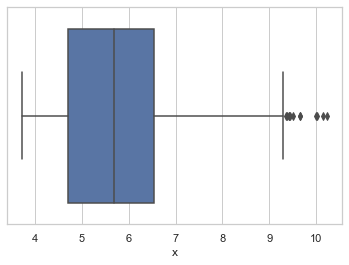

Description of y
.................................................................
count    26925.000000
mean         5.733152
std          1.163820
min          3.710000
25%          4.710000
50%          5.700000
75%          6.540000
max         58.900000
Name: y, dtype: float64
.................................................................
Plot for y
.................................................................


C:\diksha\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


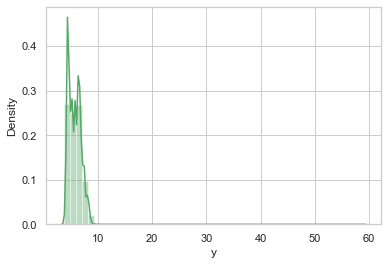

.................................................................
Plot for y
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


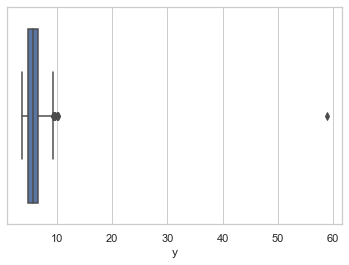

Description of z
.................................................................
count    26925.000000
mean         3.538820
std          0.717483
min          1.070000
25%          2.900000
50%          3.520000
75%          4.040000
max         31.800000
Name: z, dtype: float64
.................................................................
Plot for z
.................................................................


C:\diksha\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


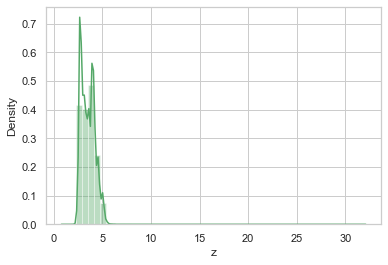

.................................................................
Plot for z
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


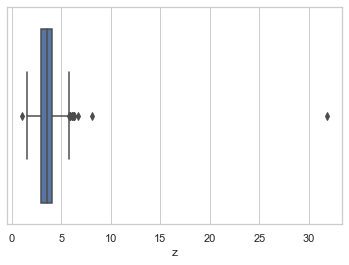

Description of price
.................................................................
count    26925.000000
mean      3936.249991
std       4020.983187
min        326.000000
25%        945.000000
50%       2373.000000
75%       5353.000000
max      18818.000000
Name: price, dtype: float64
.................................................................
Plot for price
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)

C:\diksha\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


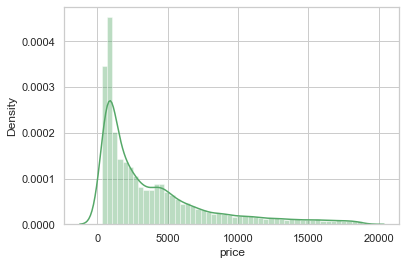

.................................................................
Plot for price
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


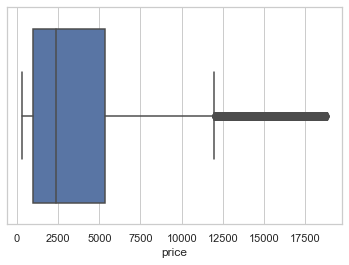

In [20]:
for i in j:
    univariateanalysis(i);
    

In [21]:
def univariateanalysis_cat(column):
    sns.countplot(df[column])
    plt.show()
    sns.boxplot(x=column,y='price',data=df)
    plt.show()

In [22]:
k=df.loc[:,df.dtypes==object].columns.to_list()

In [23]:
k

['cut', 'color', 'clarity']

C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


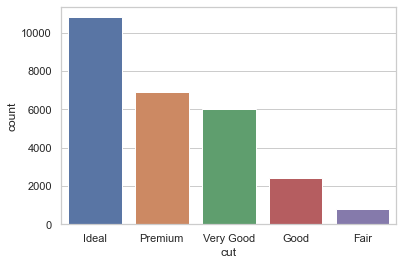

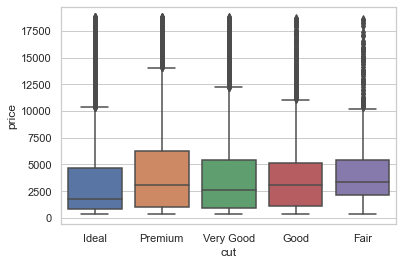

C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


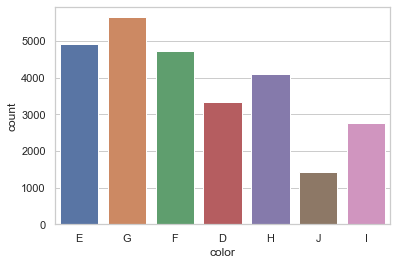

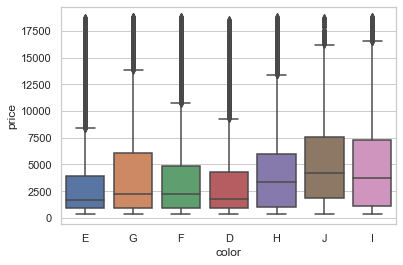

C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


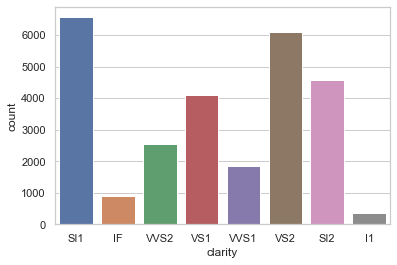

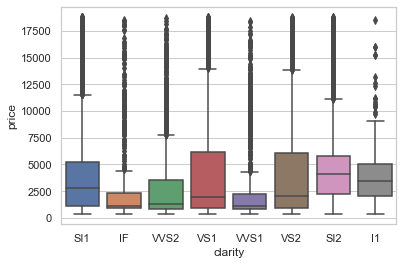

In [24]:
for i in k:
    univariateanalysis_cat(i)

In [25]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [26]:
for column in j:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

In [27]:
def univariateanalysis(column):  
    plt.figure()
    print('.................................................................')
    print('Plot for '+column)
    print('.................................................................')
    
    #print(sns.histplot(df[column]))
    #plt.show()
    print('Plot for '+column)
    print('.................................................................')
    print(sns.boxplot(df[column]))
    plt.show()
    

.................................................................
Plot for carat
.................................................................
Plot for carat
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


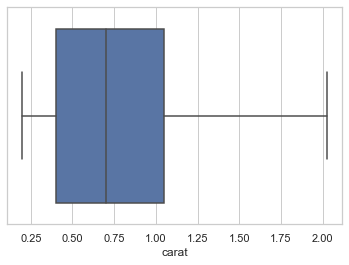

.................................................................
Plot for depth
.................................................................
Plot for depth
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


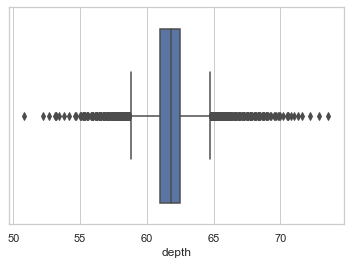

.................................................................
Plot for table
.................................................................
Plot for table
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


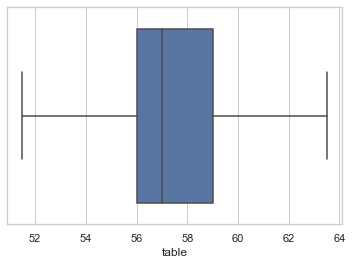

.................................................................
Plot for x
.................................................................
Plot for x
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


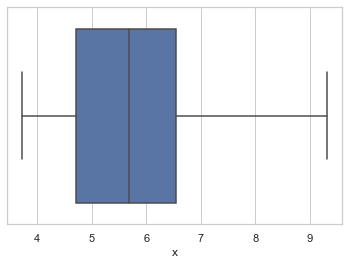

.................................................................
Plot for y
.................................................................
Plot for y
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


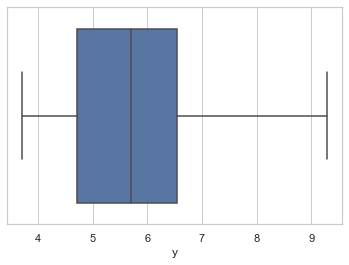

.................................................................
Plot for z
.................................................................
Plot for z
.................................................................
AxesSubplot(0.125,0.125;0.775x0.755)


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


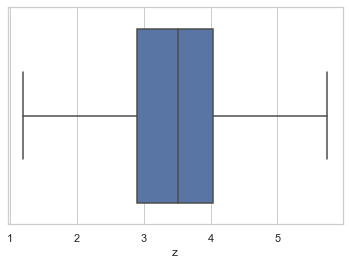

.................................................................
Plot for price
.................................................................
Plot for price
.................................................................


C:\diksha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


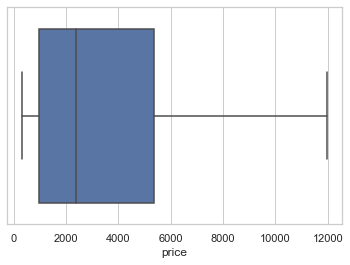

In [28]:
for i in j:
    univariateanalysis(i);

[[<AxesSubplot:title={'center':'carat'}>
  <AxesSubplot:title={'center':'depth'}>
  <AxesSubplot:title={'center':'table'}>]
 [<AxesSubplot:title={'center':'x'}> <AxesSubplot:title={'center':'y'}>
  <AxesSubplot:title={'center':'z'}>]
 [<AxesSubplot:title={'center':'price'}> <AxesSubplot:> <AxesSubplot:>]]


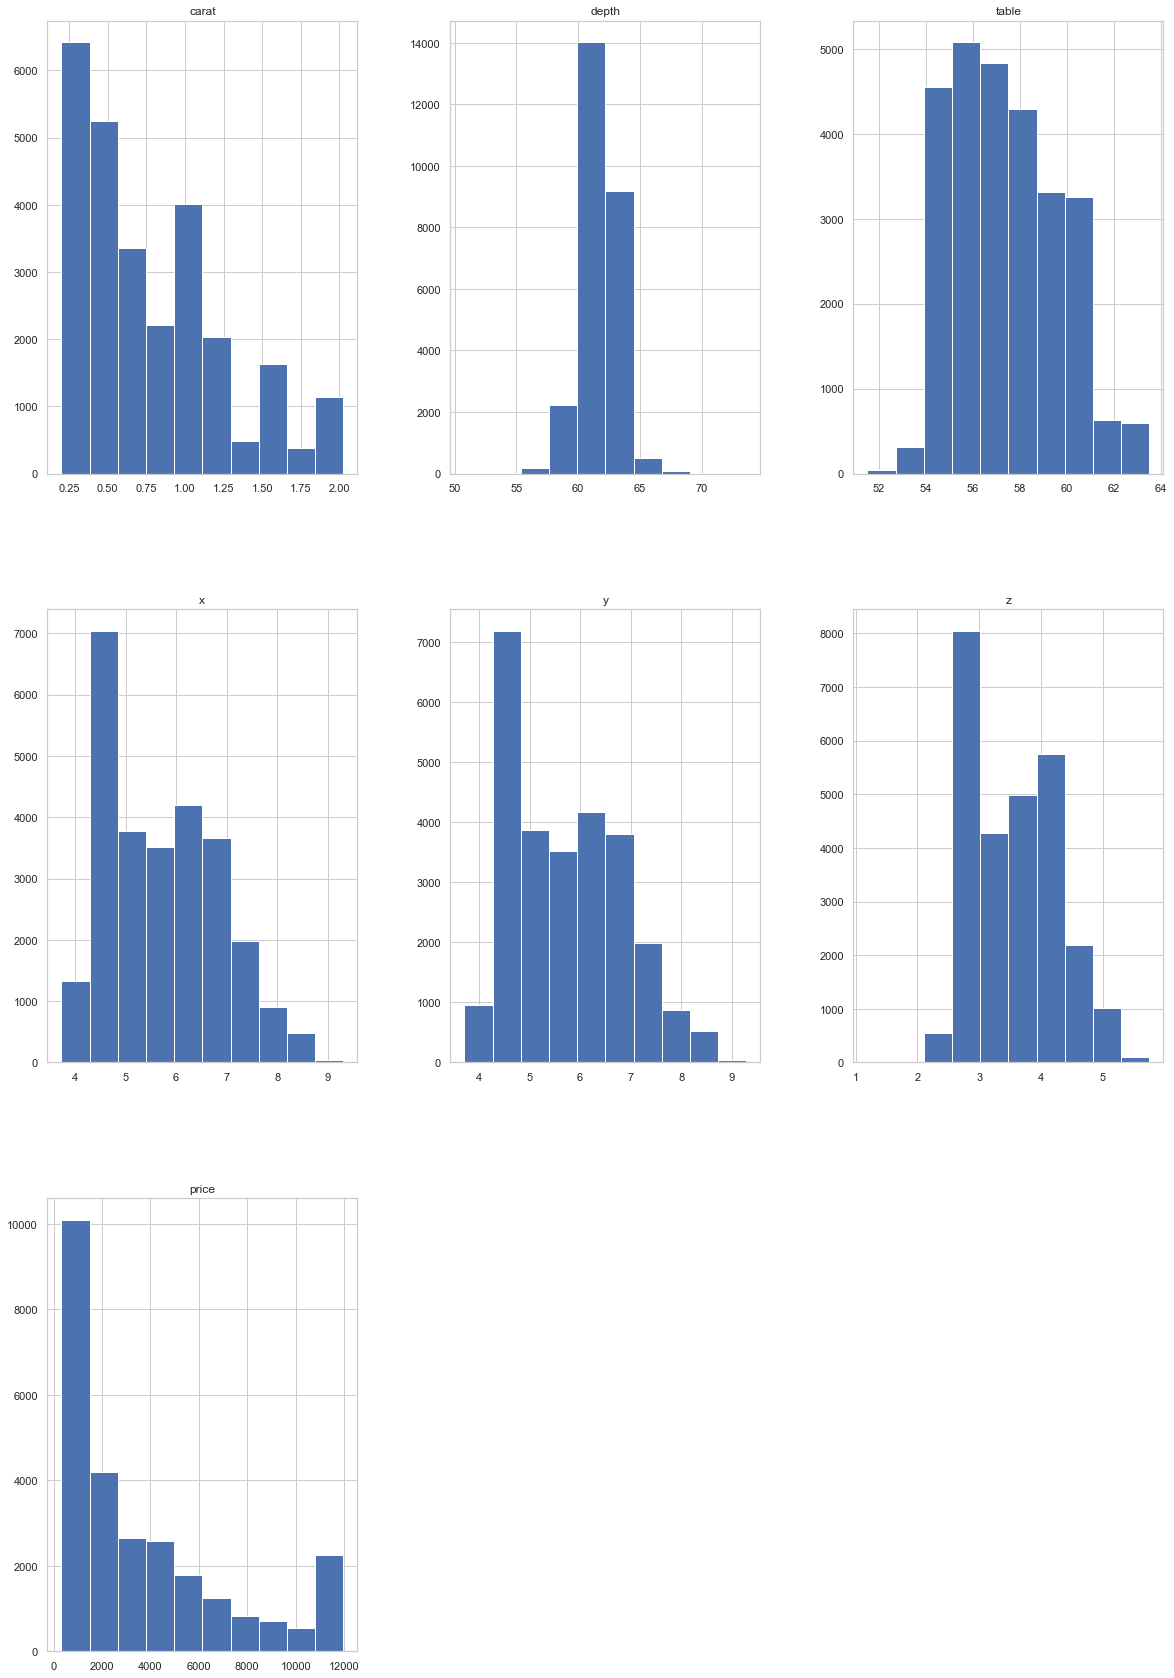

In [29]:
 print(df.hist(figsize=(20,30)));

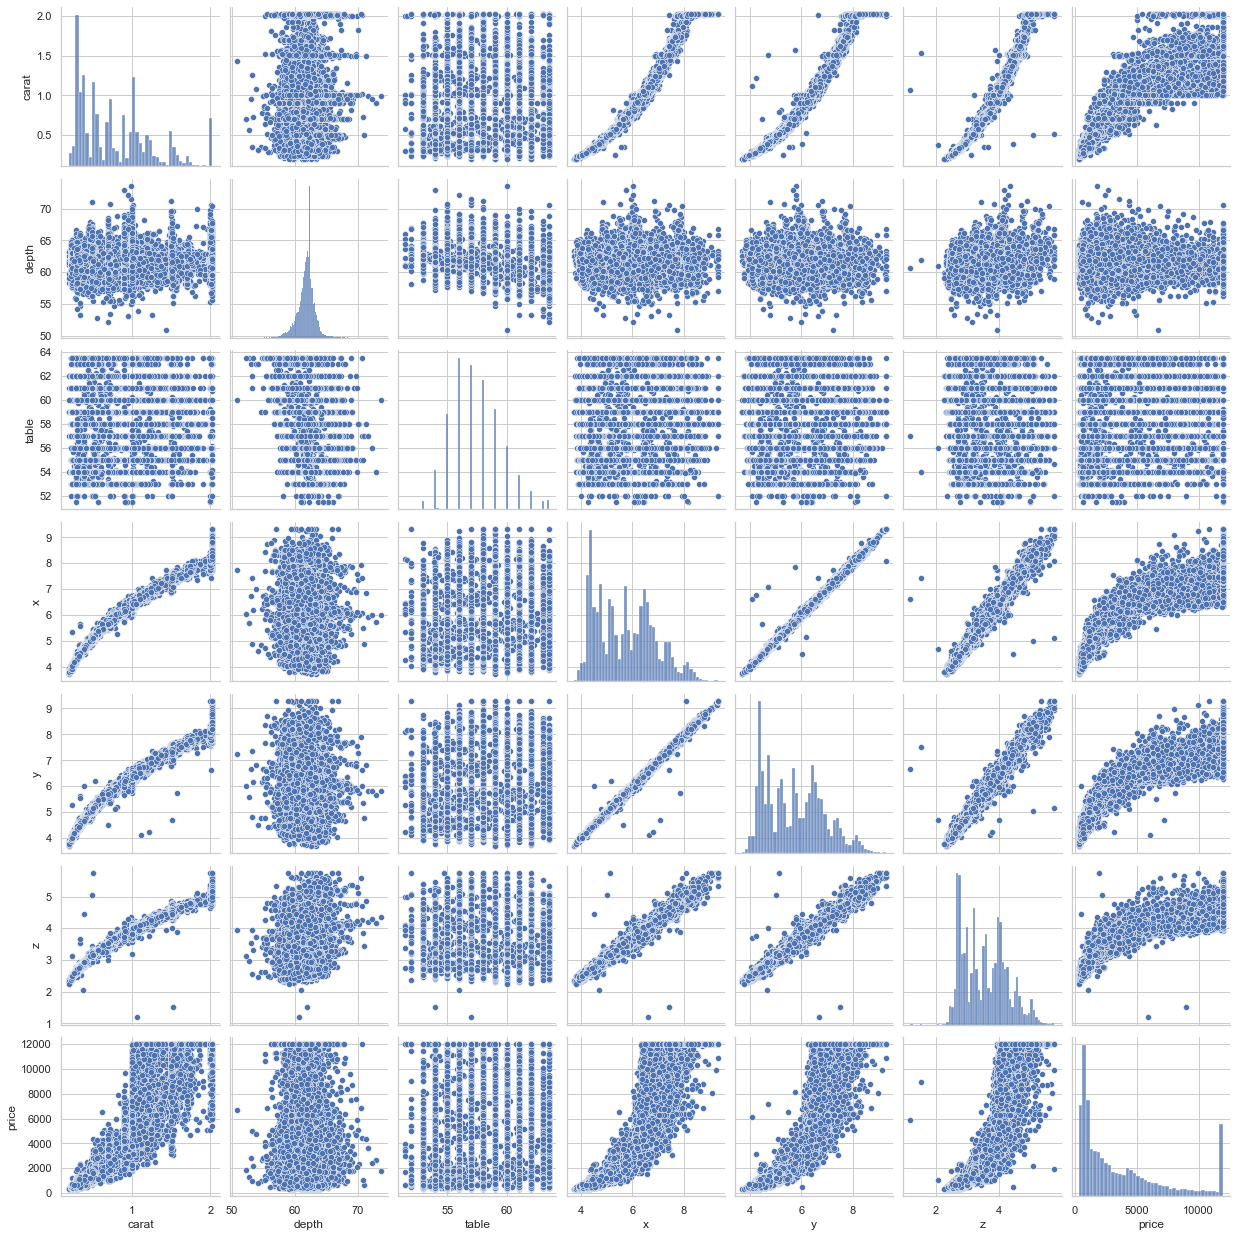

In [30]:
sns.pairplot(df)

<AxesSubplot:>

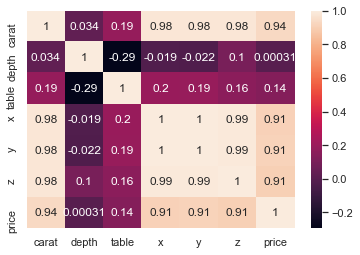

In [31]:
sns.heatmap(df.corr(),annot=True)

In [32]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [33]:
df.median()

carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.70
z           3.52
price    2373.00
dtype: float64

In [34]:
#lets replace the missing values with median value. 
df = df.fillna(df.median())

In [35]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [36]:
df.shape

(26925, 10)

In [37]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779.0


In [38]:

print('Cut\n',df['cut'].value_counts())
print('\n')
print('Color\n',df['cut'].value_counts())
print('\n')
print('clarity\n',df['cut'].value_counts())


Cut
 Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64


Color
 Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64


clarity
 Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64


In [39]:
df['cut']=np.where(df['cut'] =='Ideal', '4', df['cut'])
df['cut']=np.where(df['cut'] =='Premium', '3', df['cut'])
df['cut']=np.where(df['cut'] =='Very Good', '2', df['cut'])
df['cut']=np.where(df['cut'] =='Good', '1', df['cut'])
df['cut']=np.where(df['cut'] =='Fair', '0', df['cut'])

In [40]:
df['color']=np.where(df['color'] =='D', '6', df['color'])
df['color']=np.where(df['color'] =='E', '5', df['color'])
df['color']=np.where(df['color'] =='F', '4', df['color'])
df['color']=np.where(df['color'] =='G', '3', df['color'])
df['color']=np.where(df['color'] =='H', '2', df['color'])
df['color']=np.where(df['color'] =='I', '1', df['color'])
df['color']=np.where(df['color'] =='J', '0', df['color'])

In [41]:
df['clarity']=np.where(df['clarity'] =='IF', '7', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS1', '6', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS2', '5', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS1', '4', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS2', '3', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI1', '2', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI2', '1', df['clarity'])
df['clarity']=np.where(df['clarity'] =='I1', '0', df['clarity'])

In [42]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [ ]:
df['cut']=pd.Categorical(df['cut']).codes
df['color']=pd.Categorical(df['color']).codes
df['clarity']=pd.Categorical(df['clarity']).codes

In [ ]:
df['cut'].value_counts()

In [ ]:
df['color'].value_counts()

In [ ]:
df['clarity'].value_counts()

In [ ]:
df.dtypes

In [43]:
df['cut']=df['cut'].astype('float64')
df['color']=df['color'].astype('float64')
df['clarity']=df['clarity'].astype('float64')

In [44]:
df.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [45]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65,779.0


In [46]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe.This is the dependent variable
y = df[['price']]
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65


In [47]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [48]:
# invoke the LinearRegression function and find the bestfit model on training data
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 8901.94122507089
The coefficient for cut is 109.18812485149482
The coefficient for color is 272.92132964490276
The coefficient for clarity is 436.4411042154915
The coefficient for depth is 8.236971791614891
The coefficient for table is -17.34517038436938
The coefficient for x is -1417.9089304449492
The coefficient for y is 1464.8272701468106
The coefficient for z is -711.2250326814094


In [50]:

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3171.950447307667


In [51]:
# R square on training data
regression_model.score(X_train, y_train)


0.9311935886926559

In [57]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

# R square on testing data
regression_model.score(X_test, y_test)

0.931543712584074

In [56]:
#RMSE on Training data
from sklearn import metrics
from sklearn.metrics import mean_squared_error
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

907.1312415459143

In [58]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

911.8447345328437

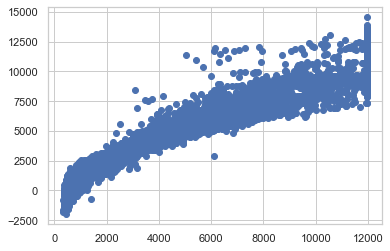

In [55]:
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['price'], y_pred)

In [60]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)


In [61]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [1]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))


NameError: name 'X_train' is not defined

In [64]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -5.879615251304733e-16


In [67]:
# R square on training data
regression_model.score(X_train_scaled, y_train_scaled)

0.9311935886926559

In [65]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

0.9315051288558229

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [70]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 121.96543302739589
cut ---> 10.388738909800345
color ---> 5.546407587131625
clarity ---> 5.455999699082339
depth ---> 1218.3824913329145
table ---> 878.3985698779234
x ---> 10744.05623520385
y ---> 9482.053091580401
z ---> 3697.5688286012546


LINEAR REGRESSION USING STATS MODEL

In [71]:
# Concat X and Y into single dataframe 
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,1.10,1.0,5.0,1.0,63.3,56.0,6.53,6.58,4.15,4065.0
12108,1.01,2.0,6.0,1.0,64.0,56.0,6.30,6.38,4.06,5166.0
20181,0.67,1.0,1.0,3.0,60.7,61.4,5.60,5.64,3.41,1708.0
4712,0.76,1.0,3.0,2.0,57.7,63.0,6.05,5.97,3.47,2447.0
2548,1.01,3.0,3.0,4.0,62.8,59.0,6.37,6.34,3.99,6618.0


In [72]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept   -3171.950447
carat        8901.941225
cut           109.188125
color         272.921330
clarity       436.441104
depth           8.236972
table         -17.345170
x           -1417.908930
y            1464.827270
z            -711.225033
dtype: float64

In [73]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.833e+04
Date:                Sat, 26 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:20:37   Log-Likelihood:            -1.5510e+05
No. Observations:               18847   AIC:                         3.102e+05
Df Residuals:                   18837   BIC:                         3.103e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3171.9504    787.532     -4.028      0.0

In [74]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [75]:
# Calculate MSE
mse1 = np.mean((lm1.predict(data_test.drop('price',axis=1))-data_test['price'])**2)

In [76]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)


907.1312415459133

In [77]:
#Root Mean Squared Error - RMSE
np.sqrt(mse1)

911.844734532842

In [78]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

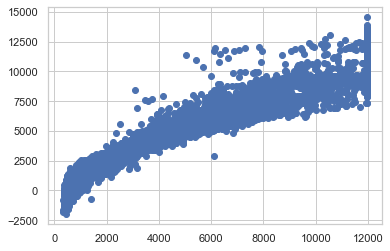

In [79]:
plt.scatter(y_test['price'], y_pred)
plt.show()